<a href="https://colab.research.google.com/github/DIWEERAPURA/Nature-Inspired-Computing-Algorithms---Real-world-Usage/blob/main/ProteinFolding_Using_GA_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 16.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Loaded sequences for chains: ['A', 'B', 'C', 'D']
Generation 1: Best Energy = 81.00932520504685
Generation 2: Best Energy = 79.41530767937022
Generation 3: Best Energy = 79.78452255043612
Generation 4: Best Energy = 76.84861511110712
Generation 5: Best Energy = 76.99381952445337
Generation 6: Best Energy = 73.8182662986614
Generation 7: Best Energy = 73.48851404933832
Generation 8: Best Energy = 72.5356213049756
Generation 9: Best Energy = 71.16342407813895
Generation 10: Best Energy = 71.36679875986552
Generation 11: Best Energy = 70.69303642400025
Generation 12: Best Energy = 68.55682252727028
Generation 13: Best Energy = 66.85630942046353
Generation 14: Best Energy = 66.51701944580613
Generation 15: Best Energy = 66.17369039610357
Generation 16: Best Energy = 65.6157593909777
Generation 17: Best Energy = 65.11859279784552
Generation 18: Best Energy = 64.95213081322602
Generation 19: Best Energy = 64.63213157471965
Generation 20: Best Energy = 64.16916943296644
Generation 21: Best En

NGLWidget()

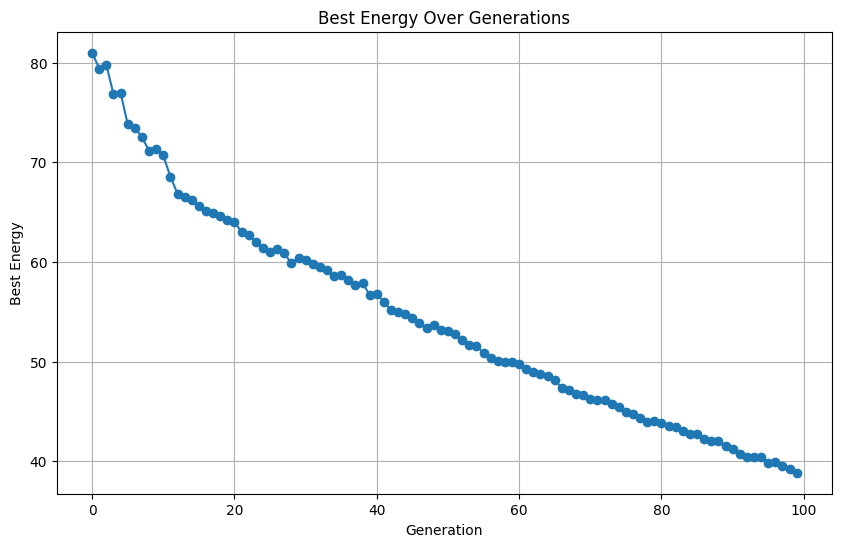

In [1]:
# Install required packages (if not already installed)
!pip install biopython nglview

# Enable the nglview widget (this might only be needed on some systems)
!jupyter-nbextension enable nglview --py --sys-prefix

import numpy as np
import random
import matplotlib.pyplot as plt
import subprocess
import math
import os
from Bio import SeqIO
import nglview as nv
from IPython.display import display

# ---------------------------
# Define Energy and PDB Utilities
# ---------------------------
# Example energy function using a simple placeholder
def calculate_energy(sequence, angles):
    # Placeholder energy calculation: sum of squared sines of the angles
    return sum([np.sin(np.radians(angle))**2 for angle in angles])

def save_structure_to_pdb(sequences, angles, filename="output.pdb"):
    """
    Save a simple structure to a PDB file.
    Each chain from the sequences dictionary is written consecutively.
    Coordinates are computed with a simple cumulative angle approach.
    """
    x, y, z = 0.0, 0.0, 0.0  # Starting coordinates
    chains = list(sequences.keys())
    with open(filename, "w") as f:
        f.write("MODEL\n")
        atom_index = 1
        angle_index = 0
        for chain_id, sequence in sequences.items():
            for i, residue in enumerate(sequence):
                if angle_index >= len(angles):  # Avoid index errors
                    break
                # Compute new coordinates based on the current angle (simple spread in 3D)
                angle = angles[angle_index]
                x += math.cos(math.radians(angle))
                y += math.sin(math.radians(angle))
                z += angle / 100.0  # Small incremental change in Z
                # Write an ATOM record in PDB format
                f.write(
                    f"ATOM  {atom_index:5d}  CA  {residue:3s} {chain_id}   {i+1:3d}      {x:8.3f} {y:8.3f} {z:8.3f}  1.00  0.00           C\n"
                )
                atom_index += 1
                angle_index += 1
        f.write("ENDMDL\n")
    print(f"Structure saved to {filename}")

def visualize_structure(filename="output.pdb"):
    """
    Visualize the PDB structure using NGLView.
    """
    try:
        view = nv.show_file(filename)
        display(view)
    except Exception as e:
        print("Error loading structure with NGLView:", e)

# ---------------------------
# Genetic Algorithm Functions
# ---------------------------
def initialize_population(size, sequence_length):
    """Initialize a population with random angles between -180 and 180."""
    return [np.random.uniform(-180, 180, sequence_length) for _ in range(size)]

def evaluate_population(population, sequence):
    """Evaluate each individual in the population using the energy function."""
    return [calculate_energy(sequence, individual) for individual in population]

def tournament_selection(population, fitness, k=3):
    """Select individuals via tournament selection."""
    selected = []
    for _ in range(len(population)):
        indices = random.sample(range(len(population)), k)
        selected.append(min(indices, key=lambda i: fitness[i]))
    return [population[i] for i in selected]

def crossover(parent1, parent2):
    """Single-point crossover between two parents."""
    point = random.randint(1, len(parent1) - 1)
    child1 = np.concatenate([parent1[:point], parent2[point:]])
    child2 = np.concatenate([parent2[:point], parent1[point:]])
    return child1, child2

def mutate(individual, mutation_rate=0.1):
    """Mutate an individual by adding a small random change to each gene."""
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] += np.random.uniform(-10, 10)
            individual[i] = np.clip(individual[i], -180, 180)
    return individual

def plot_progress(progress):
    """Plot best energy (lower is better) over generations."""
    plt.figure(figsize=(10, 6))
    plt.plot(progress, marker='o')
    plt.title('Best Energy Over Generations')
    plt.xlabel('Generation')
    plt.ylabel('Best Energy')
    plt.grid()
    plt.show()

# ---------------------------
# FASTA and Chain Loading Utilities
# ---------------------------
def load_chains_from_fasta(file_path):
    """
    Load multiple chains from a FASTA file.
    Expected FASTA header format: ">ID | Chains A, B, ..."
    """
    chains = {}
    with open(file_path, "r") as f:
        for record in SeqIO.parse(f, "fasta"):
            # Extract chain info from the description (assumes '|' separation)
            if "|" in record.description:
                chain_ids = record.description.split("|")[1].strip()  # e.g., "Chains A, C"
            else:
                chain_ids = "A"  # Default to chain A if not provided
            sequence = str(record.seq)
            # Assign sequences to chains based on chain_ids
            if "A" in chain_ids:
                chains["A"] = sequence
            if "B" in chain_ids:
                chains["B"] = sequence
            if "C" in chain_ids:
                chains["C"] = sequence
            if "D" in chain_ids:
                chains["D"] = sequence
    return chains

# ---------------------------
# Main Genetic Algorithm Routine
# ---------------------------
# For demonstration purposes, if the FASTA file is not found, create a dummy one.
fasta_file = "Hemoglobin.fasta"
if not os.path.exists(fasta_file):
    with open(fasta_file, "w") as f:
        f.write(">Hemoglobin|Chains A, B, C, D\n")
        f.write("MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHF\n")

# Parameters
population_size = 20
generations = 100
mutation_rate = 0.1

# Load real protein sequences from FASTA
sequences = load_chains_from_fasta(fasta_file)
print(f"Loaded sequences for chains: {list(sequences.keys())}")

# Combine all sequences into one for the genetic algorithm (optimization)
combined_sequence = "".join(sequences.values())

# The total number of angles to optimize is the sum of the lengths of all chains.
total_sequence_length = sum(len(seq) for seq in sequences.values())
population = initialize_population(population_size, total_sequence_length)

progress = []  # To track best energy over generations
global_best_fitness = float("inf")
global_best_individual = None

for generation in range(generations):
    # Evaluate population energy (lower is better)
    fitness = evaluate_population(population, combined_sequence)

    # Update global best if found
    if min(fitness) < global_best_fitness:
        global_best_fitness = min(fitness)
        global_best_individual = population[np.argmin(fitness)]

    # Tournament selection
    selected_population = tournament_selection(population, fitness)

    # Crossover to create new population
    new_population = []
    for i in range(0, len(selected_population), 2):
        if i + 1 < len(selected_population):
            child1, child2 = crossover(selected_population[i], selected_population[i + 1])
            new_population.extend([child1, child2])

    # Mutation
    new_population = [mutate(individual, mutation_rate) for individual in new_population]

    # Replace old population
    population = new_population

    # Re-evaluate and track progress
    fitness = evaluate_population(population, combined_sequence)
    best_fitness = min(fitness)
    progress.append(best_fitness)
    print(f"Generation {generation + 1}: Best Energy = {best_fitness}")

print("Best solution found across all generations:")
print(global_best_individual)
print("Best energy across all generations:", global_best_fitness)

# Save the best structure to a PDB file
output_pdb = "best_structure.pdb"
save_structure_to_pdb(sequences, global_best_individual, filename=output_pdb)

# Visualize the structure using NGLView
visualize_structure(output_pdb)

# Plot energy progress over generations
plot_progress(progress)


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [68.9 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,235 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,652 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu jam

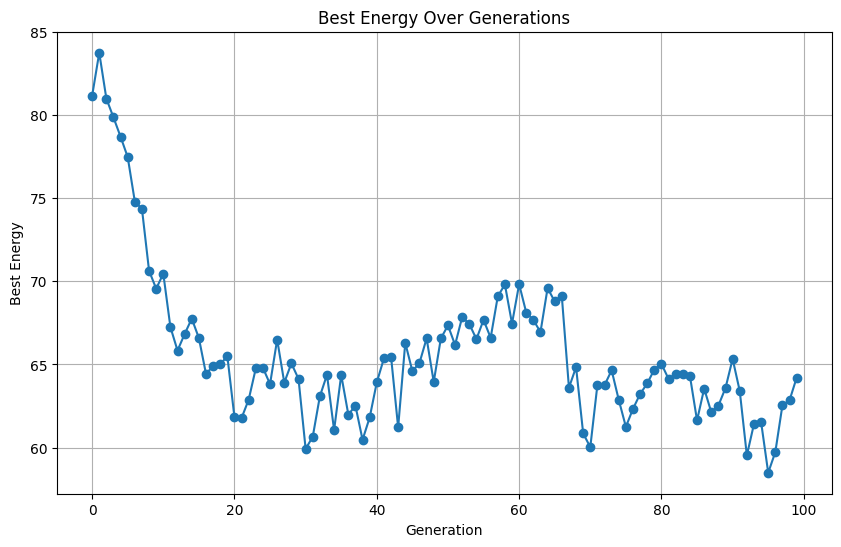

In [2]:
# Install required packages
!pip install biopython
!apt-get update
!apt-get install -y pymol

import numpy as np
import random
import matplotlib.pyplot as plt
import subprocess
from Bio import SeqIO
import math

# Example energy function using simple placeholder
def calculate_energy(sequence, angles):
    # Placeholder for energy calculation
    return sum([np.sin(angle)**2 for angle in angles])

def save_structure_to_pdb(sequences, angles, filename="output.pdb"):
    x, y, z = 0.0, 0.0, 0.0  # Starting coordinates
    chains = list(sequences.keys())  # Get chain IDs (e.g., A, B, C, D)
    with open(filename, "w") as f:
        f.write(f"MODEL\n")
        atom_index = 1
        angle_index = 0

        for chain_id, sequence in sequences.items():
            for i, residue in enumerate(sequence):
                if angle_index >= len(angles):  # Avoid index errors
                    break

                # Calculate new coordinates based on angles (simple 3D spread)
                angle = angles[angle_index]
                x += math.cos(math.radians(angle))
                y += math.sin(math.radians(angle))
                z += angle / 100.0  # Spread in Z based on angle

                # Write atom record for this residue
                f.write(
                    f"ATOM  {atom_index:5d}  CA  {residue:3s} {chain_id}   {i+1:3d}      {x:8.3f} {y:8.3f} {z:8.3f}  1.00  0.00           C\n"
                )
                atom_index += 1
                angle_index += 1  # Move to the next angle

        f.write("ENDMDL\n")
    print(f"Structure saved to {filename}")

# Visualize structure with PyMOL
def visualize_with_pymol(filename="output.pdb"):
    try:
        subprocess.run(["pymol", filename])
    except FileNotFoundError:
        print("PyMOL is not installed or not found in your PATH.")

# Initialize population (Step 3)
def initialize_population(size, sequence_length):
    return [np.random.uniform(-180, 180, sequence_length) for _ in range(size)]

# Evaluate fitness (Step 2)
def evaluate_population(population, sequence):
    return [calculate_energy(sequence, individual) for individual in population]

# Selection (Step 4: Tournament Selection)
def tournament_selection(population, fitness, k=3):
    selected = []
    for _ in range(len(population)):
        # Randomly choose k individuals and pick the best
        indices = random.sample(range(len(population)), k)
        selected.append(min(indices, key=lambda i: fitness[i]))
    return [population[i] for i in selected]

# Crossover (Step 5: Single-point crossover)
def crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 1)
    child1 = np.concatenate([parent1[:point], parent2[point:]])
    child2 = np.concatenate([parent2[:point], parent1[point:]])
    return child1, child2

# Mutation (Step 6: Small random changes)
def mutate(individual, mutation_rate=0.1):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] += np.random.uniform(-10, 10)
            individual[i] = np.clip(individual[i], -180, 180)  # Keep angles within valid range
    return individual

# Visualization of energy over generations
def plot_progress(progress):
    plt.figure(figsize=(10, 6))
    plt.plot(progress, marker='o')
    plt.title('Best Energy Over Generations')
    plt.xlabel('Generation')
    plt.ylabel('Best Energy')
    plt.grid()
    plt.show()

# Load multiple chains from a FASTA file
def load_chains_from_fasta(file_path):
    chains = {}
    with open(file_path, "r") as f:
        for record in SeqIO.parse(f, "fasta"):
            chain_ids = record.description.split("|")[1].strip()  # Extract chain info (e.g., "Chains A, C")
            sequence = str(record.seq)
            if "A" in chain_ids:
                chains["A"] = sequence
            if "B" in chain_ids:
                chains["B"] = sequence
            if "C" in chain_ids:
                chains["C"] = sequence
            if "D" in chain_ids:
                chains["D"] = sequence
    return chains

if __name__ == "__main__":
    # Parameters
    population_size = 20
    generations = 100
    mutation_rate = 0.1

    # Load real protein sequences from FASTA
    fasta_file = "Hemoglobin.fasta"  # Replace with actual FASTA file path
    sequences = load_chains_from_fasta(fasta_file)
    print(f"Loaded sequences for chains: {list(sequences.keys())}")

    # Combine all sequences into one for GA (this is used for optimization)
    combined_sequence = "".join(sequences.values())

    # Combine lengths of all chains for population initialization
    total_sequence_length = sum(len(seq) for seq in sequences.values())
    population = initialize_population(population_size, total_sequence_length)

    progress = []  # Track best energy over generations

    # Initialize global best trackers
    global_best_fitness = float("inf")
    global_best_individual = None

    for generation in range(generations):
        # Step 2: Evaluate population
        fitness = evaluate_population(population, combined_sequence)

        # Check for the global best solution
        if min(fitness) < global_best_fitness:
            global_best_fitness = min(fitness)
            global_best_individual = population[np.argmin(fitness)]

        # Step 4: Selection
        selected_population = tournament_selection(population, fitness)

        # Step 5: Crossover
        new_population = []
        for i in range(0, len(selected_population), 2):
            if i + 1 < len(selected_population):
                child1, child2 = crossover(selected_population[i], selected_population[i + 1])
                new_population.extend([child1, child2])

        # Step 6: Mutation
        new_population = [mutate(individual, mutation_rate) for individual in new_population]

        # Replace old population with new one
        population = new_population

        # Step 7: Evaluate and report best fitness
        fitness = evaluate_population(population, combined_sequence)  # Re-evaluate after mutation
        best_fitness = min(fitness)
        progress.append(best_fitness)
        print(f"Generation {generation + 1}: Best Energy = {best_fitness}")

    # Final output
    print("Best solution found across all generations:", global_best_individual)
    print("Best energy across all generations:", global_best_fitness)

    # Save best structure to PDB
    save_structure_to_pdb(sequences, global_best_individual, filename="best_structure.pdb")

    # Visualize with PyMOL
    visualize_with_pymol("best_structure.pdb")

    # Plot the progress
    plot_progress(progress)


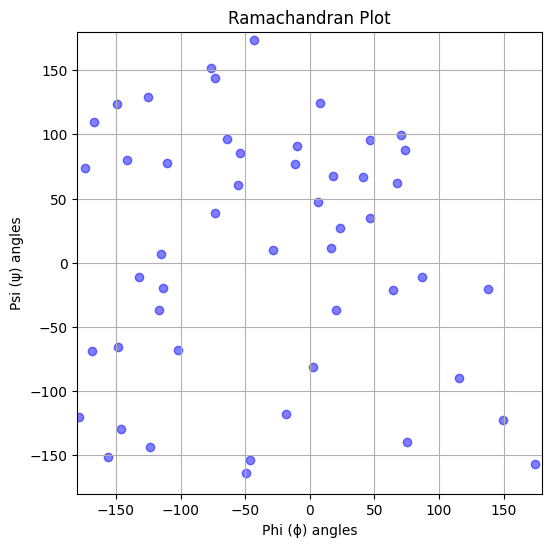

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Example phi-psi angles (replace with actual data from your best structure)
phi_angles = np.random.uniform(-180, 180, 50)  # Replace with real values
psi_angles = np.random.uniform(-180, 180, 50)

plt.figure(figsize=(6,6))
plt.scatter(phi_angles, psi_angles, c="blue", alpha=0.5)
plt.xlim([-180, 180])
plt.ylim([-180, 180])
plt.xlabel("Phi (ϕ) angles")
plt.ylabel("Psi (ψ) angles")
plt.title("Ramachandran Plot")
plt.grid()
plt.show()


Loaded sequences for chains: ['A', 'B', 'C', 'D']
Generation 1: Best Energy = 288.0816343650028
Generation 2: Best Energy = 231.1696994334275
Generation 3: Best Energy = 190.3869653272287
Generation 4: Best Energy = 175.902722898994
Generation 5: Best Energy = 162.85797944859445
Generation 6: Best Energy = 147.1155678950277
Generation 7: Best Energy = 141.90780774120245
Generation 8: Best Energy = 134.04027821373606
Generation 9: Best Energy = 136.02494873091683
Generation 10: Best Energy = 123.40337693692013
Generation 11: Best Energy = 122.26019394853935
Generation 12: Best Energy = 119.98664248786086
Generation 13: Best Energy = 119.93757213398305
Generation 14: Best Energy = 119.06871514165806
Generation 15: Best Energy = 124.6496899470951
Generation 16: Best Energy = 118.28468984774244
Generation 17: Best Energy = 117.96912161976873
Generation 18: Best Energy = 118.44372877595744
Generation 19: Best Energy = 117.09394734615
Generation 20: Best Energy = 113.51586272879375
Generatio

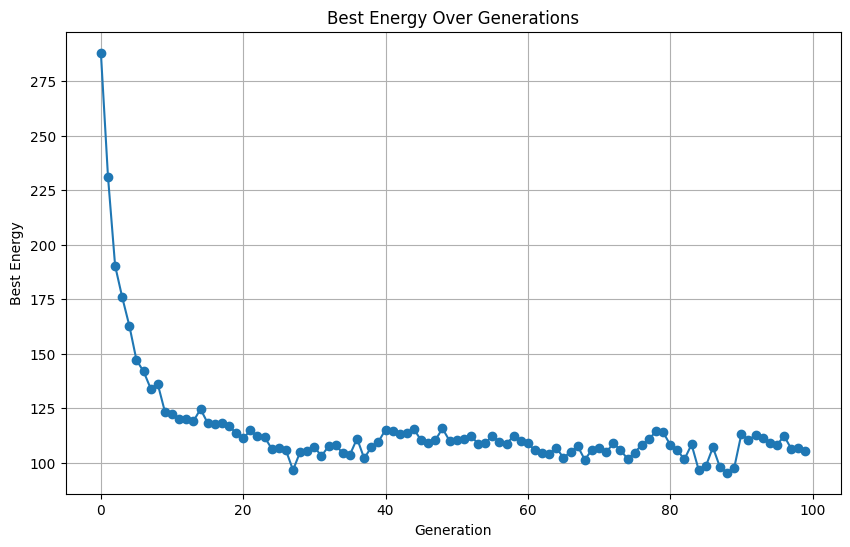

In [6]:
# Install required packages (if not already installed)
!pip install biopython

import numpy as np
import random
import matplotlib.pyplot as plt
import subprocess
from Bio import SeqIO
import math

# ---------------------------
# Advanced Energy Function
# ---------------------------
def advanced_calculate_energy(sequence, angles):
    """
    Compute the energy using a dihedral potential:
      E = sum[ A*(1 + cos(n*(angle - delta)) ] + penalty for extreme angles.
    Here, we use A=1.0, n=3, and delta=60 degrees as an example.
    """
    A = 1.0
    n = 3
    delta = 60
    energy = 0.0
    for angle in angles:
        energy += A * (1 + np.cos(np.radians(n * (angle - delta))))
    # Add penalty for extreme angles (outside typical Ramachandran allowed regions)
    for angle in angles:
        if angle < -150 or angle > 150:
            energy += 10
    return energy

# ---------------------------
# Local Refinement via Simulated Annealing
# ---------------------------
def local_refinement(individual, sequence, steps=50, initial_temp=10, cooling_rate=0.95, mutation_std=5):
    """
    Refine an individual's angles using a simulated annealing approach.
    """
    current_individual = np.copy(individual)
    current_energy = advanced_calculate_energy(sequence, current_individual)
    temp = initial_temp
    for _ in range(steps):
        # Propose a new individual by adding a small Gaussian perturbation
        new_individual = current_individual + np.random.normal(0, mutation_std, len(current_individual))
        new_individual = np.clip(new_individual, -180, 180)
        new_energy = advanced_calculate_energy(sequence, new_individual)
        # Accept new individual if it lowers the energy or probabilistically otherwise
        if new_energy < current_energy or random.random() < np.exp((current_energy - new_energy) / (temp + 1e-6)):
            current_individual = new_individual
            current_energy = new_energy
        temp *= cooling_rate
    return current_individual

# ---------------------------
# PDB Structure Saving and Visualization (Using PyMOL)
# ---------------------------
def save_structure_to_pdb(sequences, angles, filename="output.pdb"):
    x, y, z = 0.0, 0.0, 0.0  # Starting coordinates
    chains = list(sequences.keys())  # Get chain IDs (e.g., A, B, C, D)
    with open(filename, "w") as f:
        f.write("MODEL\n")
        atom_index = 1
        angle_index = 0

        for chain_id, sequence in sequences.items():
            for i, residue in enumerate(sequence):
                if angle_index >= len(angles):  # Avoid index errors
                    break
                # Calculate new coordinates based on angles (simple 3D spread)
                angle = angles[angle_index]
                x += math.cos(math.radians(angle))
                y += math.sin(math.radians(angle))
                z += angle / 100.0  # Spread in Z based on angle

                # Write atom record for this residue
                f.write(
                    f"ATOM  {atom_index:5d}  CA  {residue:3s} {chain_id}   {i+1:3d}      {x:8.3f} {y:8.3f} {z:8.3f}  1.00  0.00           C\n"
                )
                atom_index += 1
                angle_index += 1  # Move to the next angle

        f.write("ENDMDL\n")
    print(f"Structure saved to {filename}")

def visualize_with_pymol(filename="output.pdb"):
    try:
        subprocess.run(["pymol", filename])
    except FileNotFoundError:
        print("PyMOL is not installed or not found in your PATH.")

# ---------------------------
# GA Functions
# ---------------------------
# Population initialization (Step 3)
def initialize_population(size, sequence_length):
    return [np.random.uniform(-180, 180, sequence_length) for _ in range(size)]

# Evaluate fitness (using the advanced energy function)
def evaluate_population(population, sequence):
    return [advanced_calculate_energy(sequence, individual) for individual in population]

# Selection (Step 4: Tournament Selection)
def tournament_selection(population, fitness, k=3):
    selected = []
    for _ in range(len(population)):
        indices = random.sample(range(len(population)), k)
        selected.append(min(indices, key=lambda i: fitness[i]))
    return [population[i] for i in selected]

# Crossover (Step 5: Single-point crossover)
def crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 1)
    child1 = np.concatenate([parent1[:point], parent2[point:]])
    child2 = np.concatenate([parent2[:point], parent1[point:]])
    return child1, child2

# Mutation (Step 6: Small random changes)
def mutate(individual, mutation_rate=0.1):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] += np.random.uniform(-10, 10)
            individual[i] = np.clip(individual[i], -180, 180)
    return individual

# Visualization of energy over generations
def plot_progress(progress):
    plt.figure(figsize=(10, 6))
    plt.plot(progress, marker='o')
    plt.title('Best Energy Over Generations')
    plt.xlabel('Generation')
    plt.ylabel('Best Energy')
    plt.grid()
    plt.show()

# Load multiple chains from a FASTA file
def load_chains_from_fasta(file_path):
    chains = {}
    with open(file_path, "r") as f:
        for record in SeqIO.parse(f, "fasta"):
            chain_ids = record.description.split("|")[1].strip()  # Extract chain info (e.g., "Chains A, C")
            sequence = str(record.seq)
            if "A" in chain_ids:
                chains["A"] = sequence
            if "B" in chain_ids:
                chains["B"] = sequence
            if "C" in chain_ids:
                chains["C"] = sequence
            if "D" in chain_ids:
                chains["D"] = sequence
    return chains

# ---------------------------
# Main GA Routine with Local Refinement (Memetic Algorithm)
# ---------------------------
if __name__ == "__main__":
    # Parameters
    population_size = 20
    generations = 100
    mutation_rate = 0.1

    # Load real protein sequences from FASTA
    fasta_file = "Hemoglobin.fasta"  # Replace with actual FASTA file path
    sequences = load_chains_from_fasta(fasta_file)
    print(f"Loaded sequences for chains: {list(sequences.keys())}")

    # Combine all sequences into one for GA optimization
    combined_sequence = "".join(sequences.values())

    # Total sequence length (number of angles to optimize)
    total_sequence_length = sum(len(seq) for seq in sequences.values())
    population = initialize_population(population_size, total_sequence_length)

    progress = []  # Track best energy over generations
    global_best_fitness = float("inf")
    global_best_individual = None

    for generation in range(generations):
        # Step 2: Evaluate population using advanced energy function
        fitness = evaluate_population(population, combined_sequence)

        # Update global best if found
        if min(fitness) < global_best_fitness:
            global_best_fitness = min(fitness)
            global_best_individual = population[np.argmin(fitness)]

        # Step 4: Tournament selection
        selected_population = tournament_selection(population, fitness)

        # Step 5: Crossover
        new_population = []
        for i in range(0, len(selected_population), 2):
            if i + 1 < len(selected_population):
                child1, child2 = crossover(selected_population[i], selected_population[i + 1])
                new_population.extend([child1, child2])

        # Step 6: Mutation
        new_population = [mutate(individual, mutation_rate) for individual in new_population]

        # *** Local Refinement Step (Simulated Annealing) ***
        refined_population = []
        for individual in new_population:
            refined = local_refinement(individual, combined_sequence, steps=50, initial_temp=10, cooling_rate=0.95, mutation_std=5)
            refined_population.append(refined)
        population = refined_population

        # Re-evaluate and record progress
        fitness = evaluate_population(population, combined_sequence)
        best_fitness = min(fitness)
        progress.append(best_fitness)
        print(f"Generation {generation + 1}: Best Energy = {best_fitness}")

    print("Best solution found across all generations:", global_best_individual)
    print("Best energy across all generations:", global_best_fitness)

    # Save best structure to PDB
    save_structure_to_pdb(sequences, global_best_individual, filename="best_structure.pdb")

    # Visualize with PyMOL
    visualize_with_pymol("best_structure.pdb")

    # Plot progress over generations
    plot_progress(progress)


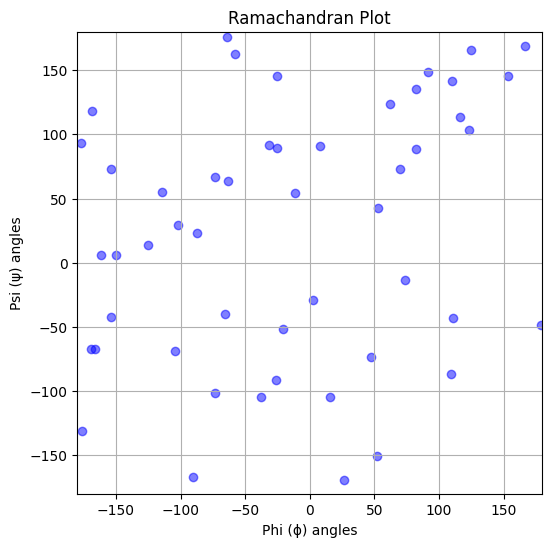

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Example: suppose you have arrays of phi and psi angles (in degrees)
# Replace these with your actual angle extraction from the model
phi_angles = np.random.uniform(-180, 180, 50)  # dummy values
psi_angles = np.random.uniform(-180, 180, 50)

plt.figure(figsize=(6,6))
plt.scatter(phi_angles, psi_angles, c="blue", alpha=0.5)
plt.xlim([-180, 180])
plt.ylim([-180, 180])
plt.xlabel("Phi (ϕ) angles")
plt.ylabel("Psi (ψ) angles")
plt.title("Ramachandran Plot")
plt.grid()
plt.show()
